In [1]:
import numpy as np
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf

**EEG Datasetindeki tar.gz Dosyalarının Listelenmesi**

Denek 1: Alkolikler

In [2]:
file_names_a = os.listdir('C:/Users/bbari/Documents/eeg_dataset/extracted/a')
print(file_names_a)
EEG_data_a = pd.DataFrame()

['co2a0000364', 'co2a0000365', 'co2a0000368', 'co2a0000369', 'co2a0000370', 'co2a0000371', 'co2a0000372', 'co2a0000375', 'co2a0000377', 'co2a0000378', 'co2a0000379', 'co2a0000380', 'co2a0000381', 'co2a0000382', 'co2a0000384', 'co2a0000385', 'co2a0000386', 'co2a0000387', 'co2a0000388', 'co2a0000390', 'co2a0000392', 'co2a0000394', 'co2a0000395', 'co2a0000396', 'co2a0000398', 'co2a0000400', 'co2a0000402', 'co2a0000403', 'co2a0000404', 'co2a0000405', 'co2a0000406', 'co2a0000407', 'co2a0000409', 'co2a0000410', 'co2a0000411', 'co2a0000412', 'co2a0000414', 'co2a0000415', 'co2a0000416', 'co2a0000417', 'co2a0000418', 'co2a0000419', 'co2a0000421', 'co2a0000422', 'co2a0000423', 'co2a0000424', 'co2a0000425', 'co2a0000426', 'co2a0000427', 'co2a0000428', 'co2a0000429', 'co2a0000430', 'co2a0000432', 'co2a0000433', 'co2a0000434', 'co2a0000435', 'co2a0000436', 'co2a0000437', 'co2a0000438', 'co2a0000439', 'co2a0000440', 'co2a0000443', 'co2a0000444', 'co2a0000445', 'co2a0000447', 'co3a0000448', 'co3a0000

Denek 2: Kontroller

In [3]:
file_names_c = os.listdir('C:/Users/bbari/Documents/eeg_dataset/extracted/c')
print(file_names_c)
EEG_data_c = pd.DataFrame()

['co2c0000337', 'co2c0000338', 'co2c0000339', 'co2c0000340', 'co2c0000341', 'co2c0000342', 'co2c0000344', 'co2c0000345', 'co2c0000346', 'co2c0000347', 'co2c0000348', 'co2c0000351', 'co2c0000352', 'co2c0000354', 'co2c0000355', 'co2c0000356', 'co2c0000357', 'co2c0000359', 'co2c0000362', 'co2c0000363', 'co2c0000364', 'co2c0000367', 'co2c0000370', 'co2c0000371', 'co2c0000373', 'co2c0000374', 'co2c0000378', 'co2c0000379', 'co2c0000381', 'co2c0000382', 'co2c0000383', 'co2c0000384', 'co2c0000387', 'co2c0000388', 'co2c0000389', 'co2c0000390', 'co2c0000391', 'co2c0000392', 'co2c0000393', 'co2c0000394', 'co2c0000395', 'co2c0000396', 'co2c0000397', 'co2c1000367', 'co3c0000402']


In [4]:
print('Datasette toplam ' + (str(len(file_names_a)) + ' alkolik ve ' + str(len(file_names_c)) + ' kontrol denek bulunmaktadır'))

Datasette toplam 77 alkolik ve 45 kontrol denek bulunmaktadır


**Listelenen Datasetteki gz Uzantılı Datanın Extract İşlemi**

In [5]:
for file in file_names_a:
    file_names_a1 = os.listdir('C:/Users/bbari/Documents/eeg_dataset/extracted/a/' + file)
for f in file_names_a1:
    data_a="C:/Users/bbari/Documents/eeg_dataset/extracted/a/" + file + '/' + f
    with gzip.open(str(data_a)) as f:
        temp_df_a = pd.read_table(f.name)
        EEG_data_a = pd.concat([EEG_data_a, temp_df_a])
        #EEG_data_a = EEG_data_a.append(temp_df_a)

In [6]:
for file_c in file_names_c:
    file_names_c1 = os.listdir('C:/Users/bbari/Documents/eeg_dataset/extracted/c/' + file_c)
for g in file_names_c1:
    data_c="C:/Users/bbari/Documents/eeg_dataset/extracted/c/" + file_c + '/' + g
    with gzip.open(str(data_c)) as g:
        temp_df_c = pd.read_table(g.name)
        EEG_data_c = pd.concat([EEG_data_c, temp_df_c])

Extract ettiğimiz dataların satır-sütun sayısına bakalım

In [7]:
print(EEG_data_a.shape)
print(EEG_data_c.shape)

(1168021, 1)
(1826061, 1)


**Dataseti Birden Fazla Sütuna Ayırma**

In [8]:
my_data_a=EEG_data_a['# co3a0000461.rd'].str.split(' ', expand=True) 
my_data_a

,0,1,2,3,4,5,6,7,8,9
0,#,120,"trials,",64,"chans,",416,samples,368,post_stim,samples
1,#,3.906000,msecs,uV,None,None,None,None,None,None
2,#,S1,obj,",",trial,0,None,None,None,None
3,#,FP1,chan,0,None,None,None,None,None,None
4,0,FP1,0,3.174,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16446,119,Y,251,38.656,None,None,None,None,None,None
16447,119,Y,252,37.679,None,None,None,None,None,None
16448,119,Y,253,37.191,None,None,None,None,None,None
16449,119,Y,254,37.679,None,None,None,None,None,None


In [9]:
my_data_c=EEG_data_c['# co3c0000402.rd'].str.split(' ', expand=True) 
my_data_c

,0,1,2,3,4,5,6,7,8,9
0,#,120,"trials,",64,"chans,",416,samples,368,post_stim,samples
1,#,3.906000,msecs,uV,None,None,None,None,None,None
2,#,S1,obj,",",trial,0,None,None,None,None
3,#,FP1,chan,0,None,None,None,None,None,None
4,0,FP1,0,-1.109,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16446,119,Y,251,-37.292,None,None,None,None,None,None
16447,119,Y,252,-36.316,None,None,None,None,None,None
16448,119,Y,253,-34.363,None,None,None,None,None,None
16449,119,Y,254,-33.386,None,None,None,None,None,None


**Datasette Yalnızca İlgili Etiketlerin Filtrelenmesi**

In [10]:
my_data_a = my_data_a[my_data_a[9] != 'samples']
my_data_a = my_data_a[my_data_a[1] != 'S1']
my_data_a = my_data_a[my_data_a[1] != 'S2']
my_data_a = my_data_a[my_data_a[2] != 'chan']
my_data_a = my_data_a[my_data_a[3] != 'uV']
my_data_a

,0,1,2,3,4,5,6,7,8,9
4,0,FP1,0,3.174,None,None,None,None,None,None
5,0,FP1,1,1.709,None,None,None,None,None,None
6,0,FP1,2,-0.244,None,None,None,None,None,None
7,0,FP1,3,-2.197,None,None,None,None,None,None
8,0,FP1,4,-2.686,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16446,119,Y,251,38.656,None,None,None,None,None,None
16447,119,Y,252,37.679,None,None,None,None,None,None
16448,119,Y,253,37.191,None,None,None,None,None,None
16449,119,Y,254,37.679,None,None,None,None,None,None


In [11]:
my_data_c = my_data_c[my_data_c[9] != 'samples']
my_data_c = my_data_c[my_data_c[1] != 'S1']
my_data_c = my_data_c[my_data_c[1] != 'S2']
my_data_c = my_data_c[my_data_c[2] != 'chan']
my_data_c = my_data_c[my_data_c[3] != 'uV']
my_data_c

,0,1,2,3,4,5,6,7,8,9
4,0,FP1,0,-1.109,None,None,None,None,None,None
5,0,FP1,1,-2.085,None,None,None,None,None,None
6,0,FP1,2,-2.085,None,None,None,None,None,None
7,0,FP1,3,-1.597,None,None,None,None,None,None
8,0,FP1,4,-2.085,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16446,119,Y,251,-37.292,None,None,None,None,None,None
16447,119,Y,252,-36.316,None,None,None,None,None,None
16448,119,Y,253,-34.363,None,None,None,None,None,None
16449,119,Y,254,-33.386,None,None,None,None,None,None


Gereksiz row ve column'lar kaldırıldıktan sonrası;

In [12]:
my_data_a=my_data_a.iloc[:,0:4]
my_data_a

,0,1,2,3
4,0,FP1,0,3.174
5,0,FP1,1,1.709
6,0,FP1,2,-0.244
7,0,FP1,3,-2.197
8,0,FP1,4,-2.686
...,...,...,...,...
16446,119,Y,251,38.656
16447,119,Y,252,37.679
16448,119,Y,253,37.191
16449,119,Y,254,37.679


In [13]:
my_data_c=my_data_c.iloc[:,0:4]
my_data_c

,0,1,2,3
4,0,FP1,0,-1.109
5,0,FP1,1,-2.085
6,0,FP1,2,-2.085
7,0,FP1,3,-1.597
8,0,FP1,4,-2.085
...,...,...,...,...
16446,119,Y,251,-37.292
16447,119,Y,252,-36.316
16448,119,Y,253,-34.363
16449,119,Y,254,-33.386


2. sütundaki tag'lerin veri setindeki toplam sayıları

In [14]:
my_data_a[1].value_counts()

FP1    18176
FP2    18176
F5     18176
F6     18176
FT7    18176
       ...  
P7     18176
PO2    18176
PO1    18176
O2     18176
Y      18176
Name: 1, Length: 64, dtype: int64

In [15]:
my_data_c[1].value_counts()

FP1    28416
FP2    28416
F5     28416
F6     28416
FT7    28416
       ...  
P7     28416
PO2    28416
PO1    28416
O2     28416
Y      28416
Name: 1, Length: 64, dtype: int64

**Datasetin son halinde;**<br>1. sütun => deneme sayısını,<br>2. sütun => deneklere yerleştirilen elektrotları,<br>3. sütun => alınan örnek sayısını,<br>4. sütun => mikrovolt cinsinden sensör değerlerini temsil etmektedir.

In [16]:
my_data_a

,0,1,2,3
4,0,FP1,0,3.174
5,0,FP1,1,1.709
6,0,FP1,2,-0.244
7,0,FP1,3,-2.197
8,0,FP1,4,-2.686
...,...,...,...,...
16446,119,Y,251,38.656
16447,119,Y,252,37.679
16448,119,Y,253,37.191
16449,119,Y,254,37.679


In [17]:
my_data_c

,0,1,2,3
4,0,FP1,0,-1.109
5,0,FP1,1,-2.085
6,0,FP1,2,-2.085
7,0,FP1,3,-1.597
8,0,FP1,4,-2.085
...,...,...,...,...
16446,119,Y,251,-37.292
16447,119,Y,252,-36.316
16448,119,Y,253,-34.363
16449,119,Y,254,-33.386


Son sütundaki value'ların type'ını nümerik hale çevirelim

In [18]:
pd.to_numeric(my_data_a[3])
pd.to_numeric(my_data_c[3])

4        -1.109
5        -2.085
6        -2.085
7        -1.597
8        -2.085
          ...  
16446   -37.292
16447   -36.316
16448   -34.363
16449   -33.386
16450   -32.898
Name: 3, Length: 1818624, dtype: float64

Datasetteki tüm tag'ler

In [19]:
tag_list_a=my_data_a[1].unique()
tag_list_a

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [20]:
tag_list_c=my_data_a[1].unique()
tag_list_c

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [21]:
print('Datasette toplam ' + str(len(my_data_a[1].unique())) + ' adet elektrot bulunmaktadır')

Datasette toplam 64 adet elektrot bulunmaktadır


Augmented Dickey Fuller(ADF) test zaman serilerinde serinin durağan olup olmadığının belirlenmesinde sağlayan bir testtir.<br>p-value için serinin durağanlığını(stationary/non-stationary) tespit edebiliriz.

p-value'nun 0,05'den küçük olması AR modelinin istatistiksel olarak anlamlı olduğunu gösterir, bu yüzden differencing(fark alma) işlemine gerek bulunmamaktadır

In [22]:
from pmdarima.arima import ADFTest
adftest=ADFTest(alpha=0.05)
adftest.should_diff(my_data_a[3])

(0.01, False)

In [23]:
adftest.is_stationary(my_data_a[3])

C:\Users\bbari\AppData\Local\Temp\ipykernel_9160\357090769.py:1: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adftest.is_stationary(my_data_a[3])


(0.01, False)

**ARIMA Modeli**

ARIMA=>AR(p), I(d), MA(q)
Tek değişkenli zaman serisi analizi ve tahmini

**p:** otoregresyon modelinin derecesi, (modeldeki bağımlı değişkenin değişme sırası)<br>
**d:** fark alma işlemi, (durağan olmayan bir seriyi durağanlaştırmak için yapılır, serideki değerleri bir önceki değerden çıkarma işlemi)<br>
**q:** hareketli ortalama(MA) modelinin derecesi

Örnek olarak FP1 tag'ini seçerek p, d, q değerleri için best model'ı bulalım

In [25]:
fp1_data=my_data_a.loc[my_data_a[1]=='FP1']
fp1_data

,0,1,2,3
4,0,FP1,0,3.174
5,0,FP1,1,1.709
6,0,FP1,2,-0.244
7,0,FP1,3,-2.197
8,0,FP1,4,-2.686
...,...,...,...,...
255,119,FP1,251,32.725
256,119,FP1,252,31.748
257,119,FP1,253,30.772
258,119,FP1,254,29.307


In [26]:
from pmdarima import model_selection
train_fp1, test_fp1 = model_selection.train_test_split(fp1_data[3], test_size=0.25)

**FP1 Etiketinin Auto Arima ile Fit Edilmesi**

In [27]:
arima_fp1 = pm.auto_arima(train_fp1, error_action='ignore',
                      suppress_warnings=True, maxiter=5, trace=True,
                      seasonal=False, m=1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=63937.470, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=112169.829, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=64601.168, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=97667.172, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=63943.657, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=63977.248, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=63890.621, Time=0.86 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=63955.245, Time=0.69 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=64396.557, Time=1.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=63880.323, Time=1.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=63937.776, Time=0.95 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=64581.520, Time=1.11 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=63879.453, Time=1.46 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=63911.079, Time=1.20 sec
 ARIMA(4,0,4)(0,0,

In [28]:
arima_fp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                13632
Model:               SARIMAX(3, 0, 4)   Log Likelihood              -31930.630
Date:                Tue, 31 Jan 2023   AIC                          63879.259
Time:                        06:00:44   BIC                          63946.941
Sample:                             0   HQIC                         63901.821
                              - 13632                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0312      0.039      0.801      0.423      -0.045       0.108
ar.L1          1.7760      0.095     18.663      0.000       1.590       1.963
ar.L2         -1.3596      0.152     -8.935      0.000      -1.658      -1.061
ar.L3          0.5653      0.082      6.909      0.000       0.405       0.726
ma.L1         -0.6048      0.095     -6.371      0.000      -0.791      -0.419
ma.L2          0.5393      0.076      7.060      0.000       0.390       0.689
ma.L3          0.0411      0.016      2.496      0.013       0.009       0.073
ma.L4          0.0055      0.012      0.436      0.663      -0.019       0.030
sigma2         6.3313      0.016    403.235      0.000       6.301       6.362
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1146397978.84
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                           -29.86
Prob(H) (two-sided):                  0.00   Kurtosis:                      1422.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Tüm Dataset için Auto-Arima ile Hesaplama Yapılması**

In [32]:
#for i in range(0,len(tag_list_a)+1):
for i in range(0,3):
    filt_tag=my_data_a.loc[my_data_a[1]==tag_list_a[i]]
    train, test = model_selection.train_test_split(filt_tag[3], test_size=0.25)
    arima = pm.auto_arima(train, error_action='ignore',
                      suppress_warnings=True, maxiter=5,
                      seasonal=False, m=1)
    print(str(tag_list_a[i]) + ": " + str(arima.order))
    

FP1: (3, 0, 4)
FP2: (2, 1, 3)
F7: (2, 1, 3)


In [33]:
for i in range(0,3):
    filt_tag_c=my_data_c.loc[my_data_c[1]==tag_list_c[i]]
    train, test = model_selection.train_test_split(filt_tag_c[3], test_size=0.25)
    arima = pm.auto_arima(train, error_action='ignore',
                      suppress_warnings=True, maxiter=5,
                      seasonal=False, m=1)
    print(str(tag_list_c[i]) + ": " + str(arima.order))

FP1: (2, 1, 5)
FP2: (2, 1, 2)
F7: (4, 1, 3)


maxiter=maksimum fonks ölçüm sayısı, mevsimsellik olmadığından seasonal=False ve m=1(default'u da aynı) olarak aldık

In [34]:
test.shape

(7104,)

In [35]:
test

582      1.689
583      2.177
584      2.665
585      3.642
586      4.130
        ...   
769    -11.342
770    -11.831
771    -10.854
772     -9.389
773     -7.924
Name: 3, Length: 7104, dtype: object

Datasetimizin %25'ini ayırdığımız test datasının son 64 satırını baz alalım

In [36]:
filt_test=test.tail(64)
filt_test = np.array(filt_test,dtype="float64")
filt_test

array([-13.295, -10.854,  -8.901,  -8.901, -10.366, -13.295, -16.225,
       -19.643, -22.085, -23.061, -21.596, -17.69 , -13.295,  -9.389,
        -8.413, -10.854, -15.737, -20.131, -22.085, -21.108, -17.202,
       -11.831,  -7.436,  -4.018,  -2.065,  -1.577,  -2.553,  -4.018,
        -5.483,  -6.46 ,  -5.483,  -3.53 ,  -1.088,   1.841,   4.771,
         6.724,   7.212,   7.212,   6.724,   6.236,   6.236,   6.236,
         5.747,   4.771,   2.818,   1.353,   0.865,   0.865,   0.376,
        -0.6  ,  -3.042,  -5.483,  -6.948,  -6.948,  -6.948,  -6.46 ,
        -7.436,  -8.901, -10.366, -11.342, -11.831, -10.854,  -9.389,
        -7.924])

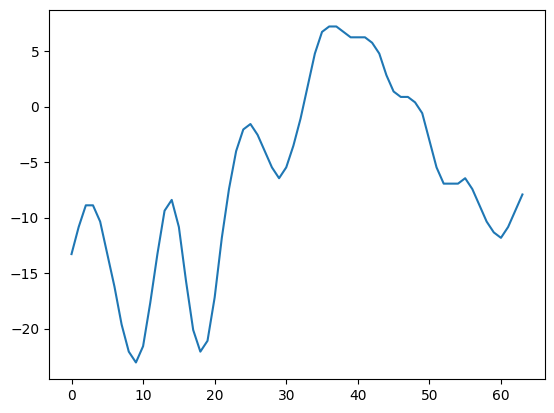

In [37]:
plt.plot(filt_test)

In [38]:
filt_train=train.head(64)
filt_train = np.array(filt_train,dtype="float64")
filt_train

array([-3.021, -5.463, -6.927, -7.416, -6.439, -4.974, -2.533,  0.397,
        2.838,  3.815,  2.35 ,  0.397, -1.068, -0.58 ,  1.862,  4.303,
        5.28 ,  4.791,  3.326,  1.373,  0.397,  0.885,  1.862,  2.838,
        2.838,  1.862,  0.885,  1.862,  3.815,  6.744,  8.209,  7.721,
        5.28 ,  2.838,  3.326,  5.768,  9.186, 11.139, 11.139,  9.674,
        8.698, 10.162, 13.092, 16.022, 16.51 , 14.069, 11.139,  9.186,
        8.698,  9.674, 10.162,  9.674,  7.721,  5.768,  5.28 ,  5.28 ,
        6.744,  8.209,  9.674, 10.162, 10.651, 10.162,  8.698,  7.233])

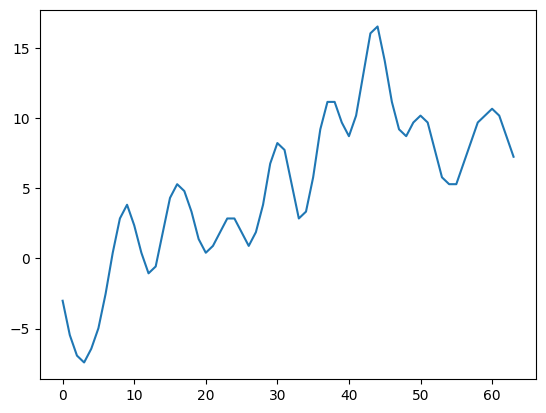

In [39]:
plt.plot(filt_train)

**Test Verileri Üzerinde Forecasting**

Test verilerinde gelecekteki değerleri tahmin etmek için üstteki adımlarda oluşturduğumuz eğitilmiş modeli kullanabiliriz.

In [40]:
predict=pd.DataFrame(arima.predict(n_periods=64))
predict

C:\Users\bbari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bbari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
21312,0.854541
21313,0.288018
21314,-0.634185
21315,-1.433113
21316,-1.824820
...,...
21371,-2.346592
21372,-2.346600
21373,-2.346607
21374,-2.346610


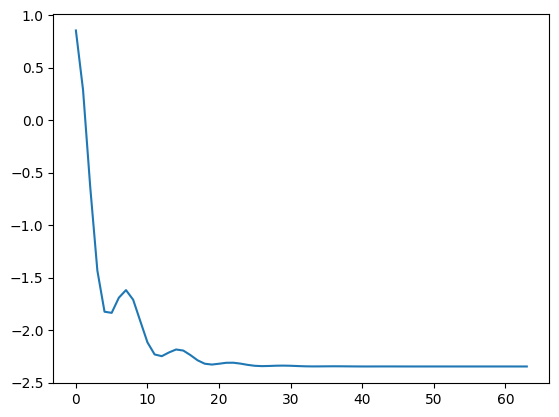

In [41]:
filt_predict = np.array(predict,dtype="float64")
plt.plot(filt_predict)

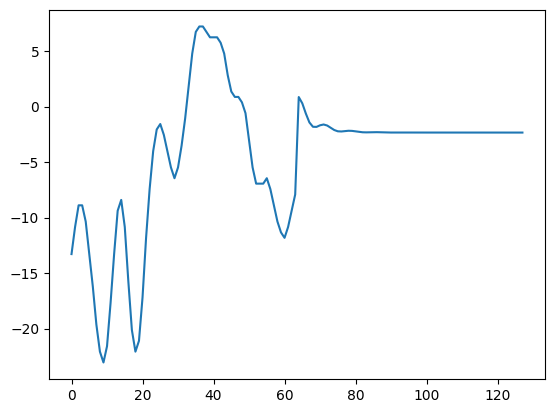

In [42]:
res=np.append(filt_test,filt_predict)
plt.plot(res)